In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(filepath_or_buffer = "LGD_DATA.csv",sep=',',header="infer") #reading csv file

In [3]:
df.head() #top five records

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [4]:
df.info() #Non-Null Count values for all records is same and equal to number of records such that no null values in dataset.
# five columns are numericals (4 integers,1 decimal) and two objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [5]:
df.drop("Ac_No",axis=1,inplace=True) # domain based unsual dolumn dropping

In [6]:
df.columns # displaying column names

Index(['Age', 'Years of Experience', 'Number of Vehicles', 'Gender', 'Married',
       'Losses in Thousands'],
      dtype='object')

In [7]:
df.nunique() # number of unique values in each columns

Age                       55
Years of Experience       54
Number of Vehicles         4
Gender                     2
Married                    2
Losses in Thousands    15289
dtype: int64

In [8]:
# Gender and Married columns have two unique columns those are categorical

# Applying Dumming first on Categorical columns

In [9]:
df_encoded = pd.get_dummies(data = df, drop_first = True)
df_encoded.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,24,5,1,203.319595,1,0
1,31,10,1,402.197302,0,1
2,56,37,1,553.132096,1,0
3,52,31,1,292.430579,0,0
4,20,3,1,246.540576,1,1


# Checking Correlation

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 

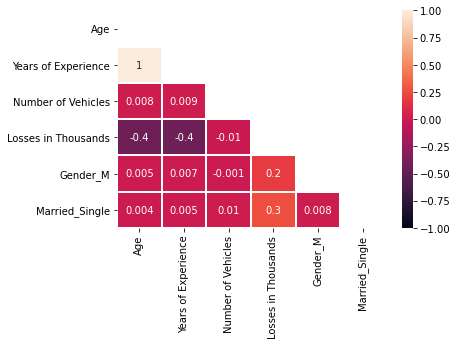

In [11]:
sns.heatmap(data=df_encoded.corr(),annot = True,vmin=-1, vmax=1,linewidths=1,fmt='.1g',mask = np.triu(df_encoded.corr()))
plt.show()

In [12]:
# negitive correlation with Losses in thousand is ,age,years of experience and number of vechicles
# column having close to zero.
# positive correlation with Losses in thousand is single married ,gender columncolumns
# we absorved same values repeated -0.4 so multicolineary might be.

# Checking multicolinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
VIF = pd.DataFrame()
VIF['columns'] = df_encoded.columns
VIF["VIF"] = [variance_inflation_factor(df_encoded.values,i) for i in range(df_encoded.shape[1])]
VIF.round(1)

,columns,VIF
0,Age,91.7
1,Years of Experience,55.2
2,Number of Vehicles,7.6
3,Losses in Thousands,4.7
4,Gender_M,2.1
5,Married_Single,2.2


In [15]:
# one by one dropping until less than 10 0r 5 based on VIF score

In [16]:
df_encodedOriginal = df_encoded.copy()
df_encoded.drop("Age",axis=1,inplace=True) # VIF based unsual dolumn dropping

In [17]:
VIF = pd.DataFrame()
VIF['columns'] = df_encoded.columns
VIF["VIF"] = [variance_inflation_factor(df_encoded.values,i) for i in range(df_encoded.shape[1])]
VIF.round(0)

,columns,VIF
0,Years of Experience,3.0
1,Number of Vehicles,4.0
2,Losses in Thousands,4.0
3,Gender_M,2.0
4,Married_Single,2.0


In [18]:
#Generally based on VIF accuracy will drop may or may not , Here we will take a idea on what bases will drop ,
#domain knowledge and experientmentation required. Here all columnns required based on domain .

# Applying train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df_encodedOriginal.loc[:,["Years of Experience","Number of Vehicles","Gender_M","Married_Single","Age"]]
y = df_encodedOriginal["Losses in Thousands"]
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(10703, 5) (4587, 5) (10703,) (4587,)


In [22]:
x_train.head()

,Years of Experience,Number of Vehicles,Gender_M,Married_Single,Age
14021,49,4,1,0,68
10757,31,3,0,0,49
12299,28,3,0,1,45
12478,0,3,1,1,19
3207,16,2,0,0,36


# Applying LinearRegression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1,fit_intercept=True)
model

LinearRegression(n_jobs=-1)

In [25]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [26]:
model.intercept_ # c value of y = m1x1 + m2x2 + m3x3 +....+ c

525.4414005270214

In [27]:
model.coef_ # m1,m2,m3...

array([ -0.8110559 ,  -1.7909082 ,  97.26637702, 136.80434436,
        -5.35883861])

In [28]:
model.n_features_in_

5

In [29]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

# Predictions

In [30]:
predictions = model.predict(x_test)
type(predictions),predictions.shape

(numpy.ndarray, (4587,))

In [31]:
predictions

array([533.38454333, 495.47213679, 396.32803875, ..., 242.73682144,
       436.11816631, 323.28442313])

# Evaluation Metrics

In [32]:
from sklearn import metrics

In [33]:
print("MSE ",metrics.mean_squared_error(y_test,predictions))

MSE  45245.19101540733


In [34]:
print("R2Score ",metrics.r2_score(y_test,predictions))

R2Score  0.2953200957211537


In [35]:
print("RMSE ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE  212.70917003130666


In [36]:
sse=sum((y_test-predictions)**2)
print("sum of squared errors:",sse)

tss=y_test.var()*len(y_test)
print("baseline error",tss)

r2=1-(sse/tss)
print('R2 score',r2)

sum of squared errors: 207539691.18767327
baseline error 294580482.5484054
R2 score 0.295473721163552
